**COMPREHENDING MULTILAYER PERCEPTRONS : HOW NETWORK DEPTH AFFECTS EFFICIENCY**

**GITHUB LINK : https://github.com/SriVarshan733/Machine-learning-and-Neural-Network-Assignment-.git**

**PRACTICAL IMPLEMENTATION**

**NAME : SRIVARSHAN MEIPRAKASH**

**STUDENT ID : 23075537**

In [ ]:
pip install numpy matplotlib keras

**Importing the required libraries**

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

**Training & Testing of MNIST dataset**

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


**Architecture of MLPS**

In [4]:
# Create a Sequential model
model = Sequential()

# Flatten the input data
model.add(Flatten(input_shape=(28, 28)))

# Add hidden layers
model.add(Dense(128, activation='relu'))  # First hidden layer with 128 neurons
model.add(Dense(64, activation='relu'))   # Second hidden layer with 64 neurons

# Add output layer
model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8787 - loss: 0.4183 - val_accuracy: 0.9612 - val_loss: 0.1233
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9670 - loss: 0.1087 - val_accuracy: 0.9724 - val_loss: 0.0903
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9784 - loss: 0.0688 - val_accuracy: 0.9731 - val_loss: 0.0844
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9835 - loss: 0.0528 - val_accuracy: 0.9758 - val_loss: 0.0789
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9871 - loss: 0.0410 - val_accuracy: 0.9763 - val_loss: 0.0808
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9899 - loss: 0.0316 - val_accuracy: 0.9763 - val_loss: 0.0815
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9917 - loss: 0.0252 - val_accuracy: 0.9779 - val_loss: 0.0761
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9926 - loss: 0.0229

**Evaluation of Model**

In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9766 - loss: 0.0982
Test accuracy: 0.9793


**Plotting of Model Accuracy & loss**

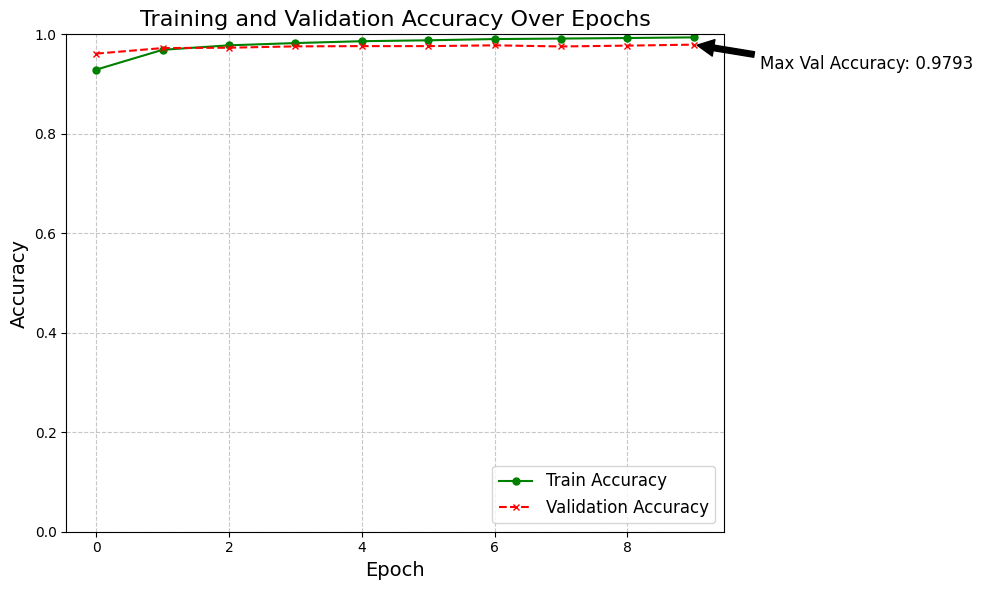

In [11]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], color='green', linestyle='-', marker='o', markersize=5, label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='red', linestyle='--', marker='x', markersize=5, label='Validation Accuracy')

# Add title and labels
plt.title('Training and Validation Accuracy Over Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Set y-axis limit
plt.ylim(0, 1)

# Add legend
plt.legend(loc='lower right', fontsize=12)

# Annotate the maximum validation accuracy
max_val_accuracy = max(history.history['val_accuracy'])
max_val_accuracy_epoch = history.history['val_accuracy'].index(max_val_accuracy)
plt.annotate(f'Max Val Accuracy: {max_val_accuracy:.4f}',
             xy=(max_val_accuracy_epoch, max_val_accuracy),
             xytext=(max_val_accuracy_epoch + 1, max_val_accuracy - 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

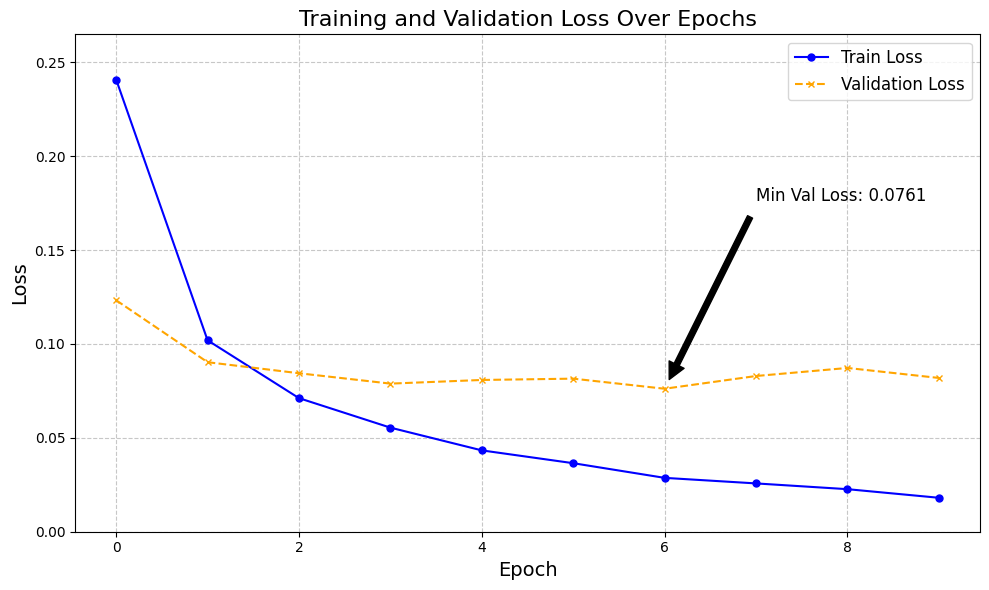

In [8]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], color='blue', linestyle='-', marker='o', markersize=5, label='Train Loss')
plt.plot(history.history['val_loss'], color='orange', linestyle='--', marker='x', markersize=5, label='Validation Loss')

# Add title and labels
plt.title('Training and Validation Loss Over Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Set y-axis limit
plt.ylim(0, max(max(history.history['loss']), max(history.history['val_loss'])) * 1.1)

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Annotate the minimum validation loss
min_val_loss = min(history.history['val_loss'])
min_val_loss_epoch = history.history['val_loss'].index(min_val_loss)
plt.annotate(f'Min Val Loss: {min_val_loss:.4f}',
             xy=(min_val_loss_epoch, min_val_loss),
             xytext=(min_val_loss_epoch + 1, min_val_loss + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Save the model for future use
model.save('mnist_mlp_model.h5')